      id_x                           coords  start_year  url_name_x  \
1      147  POINT(-87.61666667 41.83333333)      1892.0     chicago   
2      147  POINT(-87.61666667 41.83333333)      1892.0     chicago   
3      147  POINT(-87.61666667 41.83333333)      1892.0     chicago   
4      147  POINT(-87.61666667 41.83333333)      1892.0     chicago   
5      147  POINT(-87.61666667 41.83333333)      1892.0     chicago   
...    ...                              ...         ...         ...   
1230   252  POINT(-77.03333333 38.88333333)      1969.0  washington   
1231   252  POINT(-77.03333333 38.88333333)      1969.0  washington   
1232   252  POINT(-77.03333333 38.88333333)      1969.0  washington   
1233   252  POINT(-77.03333333 38.88333333)      1969.0  washington   
1234   252  POINT(-77.03333333 38.88333333)      1969.0  washington   

            country country_state  city_id                     name_y  
1     United States          Ill.      147                   Red Line  
2  

/home/daniel/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


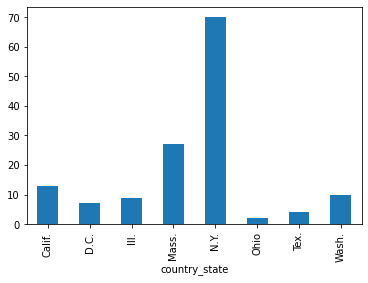

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


cities = pd.read_csv('/media/daniel/2DA8-3E30/Galvanize/GDS-Pandas-EDA-Case-Study/data/data/cities.csv')
lines = pd.read_csv('/media/daniel/2DA8-3E30/Galvanize/GDS-Pandas-EDA-Case-Study/data/data/lines.csv')
station_lines = pd.read_csv('/media/daniel/2DA8-3E30/Galvanize/GDS-Pandas-EDA-Case-Study/data/data/station_lines.csv')
stations = pd.read_csv('/media/daniel/2DA8-3E30/Galvanize/GDS-Pandas-EDA-Case-Study/data/data/stations.csv')
track_lines = pd.read_csv('/media/daniel/2DA8-3E30/Galvanize/GDS-Pandas-EDA-Case-Study/data/data/track_lines.csv')
tracks = pd.read_csv('/media/daniel/2DA8-3E30/Galvanize/GDS-Pandas-EDA-Case-Study/data/data/tracks.csv')


# print(cities.columns)
# # 'id', 'name', 'coords', 'start_year', 'url_name', 'country',
# #        'country_state'
# print(lines.columns)
# # 'id', 'city_id', 'name', 'url_name', 'color', 'system_id',
# # 'transport_mode_id'

# print(station_lines.columns)
# #'id', 'station_id', 'line_id', 'city_id', 'created_at', 'updated_at']
# print(stations.columns)
# #'id', 'name', 'geometry', 'buildstart', 'opening', 'closure',
# #       'city_id']

# print(track_lines.columns)
# #'id', 'section_id', 'line_id', 'created_at', 'updated_at', 'city_id'
# print(tracks.columns)
#id', 'geometry', 'buildstart', 'opening', 'closure', 'length'

'''
pd.concat(
    objs,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)
'''
#(cities['id'] == track_lines['city_id']).value_counts()

cities_track_lines = pd.merge(cities, track_lines, left_on = 'id', right_on = 'city_id', how = 'inner')
# print(cities_track_lines.head())
# 0   5  Aberdeen                POINT(-2.15 57.15)      2017.0  ...   154.0  2017-11-21 00:00:00  2017-11-21 00:00:00    118.0
cities_station_lines = pd.merge(cities, station_lines, left_on = 'id', right_on = 'city_id', how = 'inner')
# print(cities_station_lines.head())

cities_lines = pd.merge(cities, lines, left_on = 'id', right_on = 'city_id', how = 'inner')

#USA
# #cities_track_lines
# mask = cities_track_lines['country'] == 'United States'
# print(cities_track_lines[mask].info())
# USA1= cities_track_lines[mask]
# USA1.drop(['id_x', 'id_y', 'url_name', 'section_id', 'line_id', 'created_at', 'updated_at' ], axis = 1, inplace = True)
# print(only_Chicago)

# #cities_station_lines
# mask2 = cities_station_lines['country'] == 'United States'
# USA2 = cities_station_lines[mask2]
# USA2.drop(['station_id', 'id_y','line_id' , 'created_at', 'updated_at'], axis = 1, inplace = True)
# print(only_Chicago2)

#cities_lines
mask3 = cities_lines['country'] == 'United States'
USA3 = cities_lines[mask3]
USA3.drop(['system_id', 'id_y', 'url_name_y', 'color', 'transport_mode_id' ,"name_x"], axis = 1, inplace = True)
print(USA3)
#print(cities_lines.head())

#counts
print(USA3.describe())
country_group = USA3.groupby('country_state')['country']
fig, ax = plt.subplots()
country_group = country_group.count().plot.bar()

plt.show()

TypeError: unhashable type: 'numpy.ndarray'

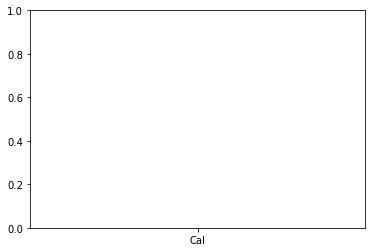

In [6]:
#counts
# print(USA3.describe())
print(USA3.groupby('country_state'))
country_group = USA3.groupby('country_state')['country']
# country_group = country_group.reset_index()
print(country_group)
fig, ax = plt.subplots()
ax.bar(['Cal','D.C.','Ill','Mass','N.Y.','Ohio','Tex','Wash'], country_group)
country_group.set_title('USA')
country_group.set_xlabel('States')
country_group.set_ylabel('Number of tracks')
#id_x, coords, start_year, country_state, city_id



plt.show()